In [1]:
import pandas as pd
from pandas import Series, DataFrame
import sqlite3
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 15})
%matplotlib inline
data = pd.read_csv('spend.csv')
L = DataFrame(data)
L = L.rename(columns = {"Account Type": "Account_type"})
L = L.rename(columns = {"Character Code": "Character_code"})
L = L.rename(columns = {"2015": "year_2015"})
L = L.rename(columns = {"2016": "year_2016"})
L = L.rename(columns = {"2017": "year_2017"})
L = L.rename(columns = {"2018": "year_2018"})
L["Agency"] = L["Agency"].str.replace(" - ", "", regex = False)
L = L.fillna(0)

L["year_2015"] = np.abs(L["year_2015"]) 
L["year_2016"] = np.abs(L["year_2016"]) 
L["year_2017"] = np.abs(L["year_2017"]) 
L["year_2018"] = np.abs(L["year_2018"]) 
L1 = L[L["Agency"] == "15 FINANCE"]
L1

,Agency,Organization,Account_type,Character_code,Object,year_2015,year_2016,year_2017,year_2018
145,15 FINANCE,15100 - FIN ACCOUNTING,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,15240.83,15000.00,15000.00,15000.00
266,15 FINANCE,15400 - FIN ADMIN SUPPORT,Revenue,42 - INTERGOV REVENUES,42410 - OTHER UNIT OF GOV REVENUES OP,1002.30,157.28,808.07,242.39
472,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54330 - EQUIP IMPROV REPAIR MAINT,0.00,0.00,0.00,117.82
495,15 FINANCE,15100 - FIN ACCOUNTING,Expense,51 - SALARIES,51120 - PREMIUM PAY,0.00,0.00,0.00,2.46
806,15 FINANCE,15230 - FIN INTERNAL AUDIT,Expense,54 - PURCHASED SERVICES,54120 - TELEPHONE,0.00,0.00,3.62,0.00
807,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,3.83,0.00
808,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54515 - MILEAGE,0.00,0.00,4.02,0.00
824,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
825,15 FINANCE,15111 - FIN ACCOUNTING PURCHASING,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
826,15 FINANCE,15400 - FIN ADMIN SUPPORT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.94,0.00


,Character_code,year2015,year2016,year2017,year2018
0,42 - INTERGOV REVENUES,1002.30,157.28,808.07,242.39
1,47 - MISC REVENUE,15240.83,15000.00,15000.00,15000.00
2,48 - OTHER FINANCE SOURCE,2.12,0.00,0.00,0.00
3,49 - TRANSFER IN,0.00,0.00,15745.00,0.00
4,51 - SALARIES,2019698.60,2123309.20,2238184.76,2229594.99
5,52 - BENEFITS,803152.18,713268.44,809549.64,756532.11
6,53 - SUPPLIES,37081.37,41744.06,49753.88,37136.08
7,54 - PURCHASED SERVICES,558984.80,506544.76,609997.76,564544.12
8,56 - DEBT OTHR FINANCING,0.00,0.00,167.56,0.00
9,57 - INTER DEPART CHARGES,12200.00,13337.00,15450.00,7841.00


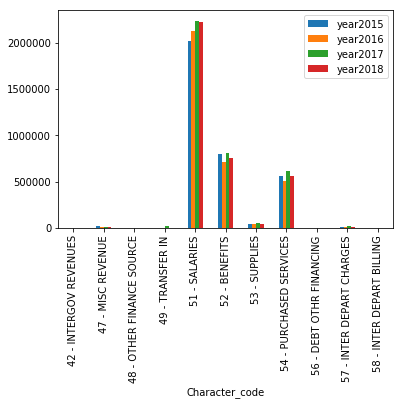

In [2]:
conn = sqlite3.connect('data.db')
L1.to_sql("data_table", conn, if_exists="replace", index=False)
df1 = pd.read_sql("select Character_code, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018 from data_table group by Character_code", conn)

df1.plot.bar(x = "Character_code")
None
df1

,Organization,year2015,year2016,year2017,year2018
0,15100 - FIN ACCOUNTING,1336455.97,1368413.63,1544611.61,1384565.75
1,15110 - FIN ACCOUNTING PAYROLL,493075.40,361960.82,371762.37,405551.73
2,15111 - FIN ACCOUNTING PURCHASING,386420.09,407154.60,419333.82,450175.15
3,15200 - FIN BUDGET AND PROGRAM MGMT,604483.30,661600.10,714824.44,784647.81
4,15230 - FIN INTERNAL AUDIT,43824.34,34235.54,77382.95,9116.79
5,15300 - FIN RISK MGMT,20681.96,16512.36,45094.59,5294.74
6,15400 - FIN ADMIN SUPPORT,562421.14,563483.69,581646.89,571538.72


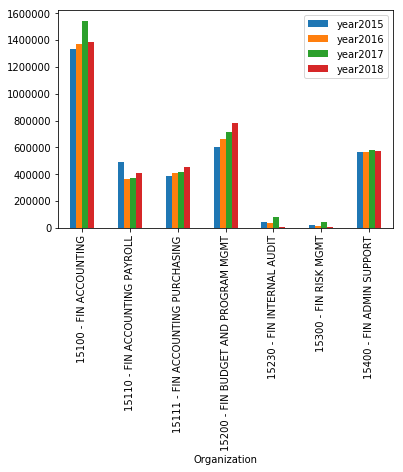

In [3]:
df2 = pd.read_sql("select Organization, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018 from data_table group by Organization", conn)

df2.plot.bar(x = "Organization")
None 
df2

,revenue,expense
year,,
2015,16.24525,3431.11695
2016,15.15728,3398.20346
2017,31.55307,3723.10360
2018,15.24239,3595.64830


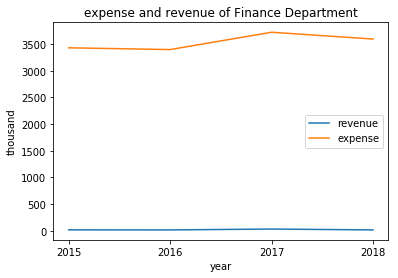

In [18]:
L_revenue = L1[L1["Account_type"] == "Revenue"]
L_expense = L1[L1["Account_type"] == "Expense"]
dic = {}
revenue = []
expense = []
revenue.append( L_revenue["year_2015"].sum()/1000)
revenue.append( L_revenue["year_2016"].sum()/1000)
revenue.append( L_revenue["year_2017"].sum()/1000)
revenue.append( L_revenue["year_2018"].sum()/1000)
expense.append(L_expense["year_2015"].sum()/1000)
expense.append(L_expense["year_2016"].sum()/1000)
expense.append(L_expense["year_2017"].sum()/1000)
expense.append(L_expense["year_2018"].sum()/1000)
dic["year"] = ["2015", "2016", "2017", "2018"]
dic["revenue"] = revenue
dic["expense"] = expense

df_3 = pd.DataFrame(dic)
df_3 = df_3.set_index("year")

ax = df_3.plot.line(title = "expense and revenue of Finance Department")
ax.set_xticks(range(len(df_3.index)))
ax.set_xticklabels(df_3.index)
ax.set_ylabel('thousand')
None
df_3

Character_code,42 - INTERGOV REVENUES,47 - MISC REVENUE,48 - OTHER FINANCE SOURCE,49 - TRANSFER IN
year_2015,1002.30,15240.83,2.12,0.0
year_2016,157.28,15000.00,0.00,0.0
year_2017,808.07,15000.00,0.00,15745.0
year_2018,242.39,15000.00,0.00,0.0


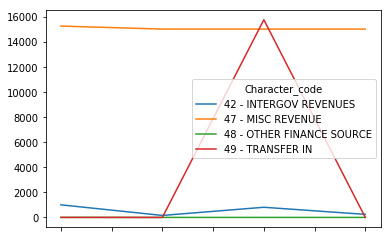

In [5]:
df_4 = L_revenue.groupby(by = "Character_code").sum()
df_4 = np.abs(df_4)
df_5 = df_4.stack()
df_5 = df_5.unstack(0)
df_5.plot.line()
None 
df_5

Character_code,51 - SALARIES,52 - BENEFITS,53 - SUPPLIES,54 - PURCHASED SERVICES,56 - DEBT OTHR FINANCING,57 - INTER DEPART CHARGES,58 - INTER DEPART BILLING
year_2015,2019.69860,803.15218,37.08137,558.98480,0.00000,12.200,0.0
year_2016,2123.30920,713.26844,41.74406,506.54476,0.00000,13.337,0.0
year_2017,2238.18476,809.54964,49.75388,609.99776,0.16756,15.450,0.0
year_2018,2229.59499,756.53211,37.13608,564.54412,0.00000,7.841,0.0


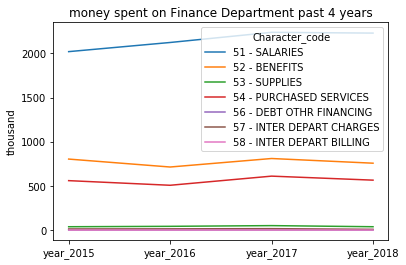

In [20]:
df_5 = L_expense.groupby(by = "Character_code").sum()
df_5 = np.abs(df_5)
df_5["year_2015"] = df_5["year_2015"] / 1000
df_5["year_2016"] = df_5["year_2016"] / 1000
df_5["year_2017"] = df_5["year_2017"] / 1000
df_5["year_2018"] = df_5["year_2018"] / 1000
df_5 = df_5.stack()
df_5 = df_5.unstack(0)
ax = df_5.plot.line(title = "money spent on Finance Department past 4 years")
ax.set_xticks(range(len(df_5.index)))
ax.set_xticklabels(df_5.index)
ax.set_ylabel('thousand')
None
df_5

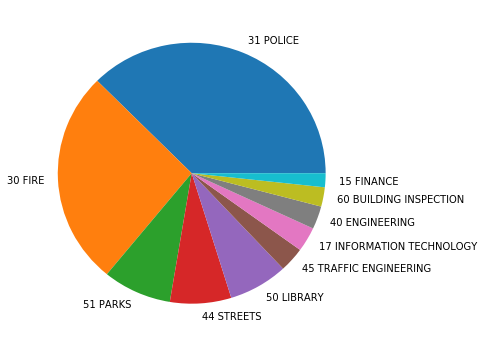

In [7]:
conn = sqlite3.connect('data.db')
L.to_sql("data_table", conn, if_exists="replace", index=False)
df6 = pd.read_sql("select Agency, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES' group by Agency order by total DESC", conn)
df_6 = df6.set_index("Agency")
df_6["total"].head(10).plot.pie(figsize=(6,6), label="")


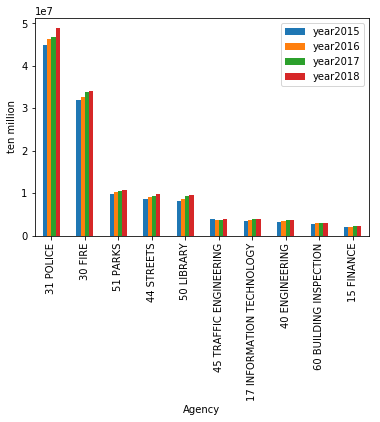

In [8]:
df7 = df6.set_index("Agency")
df7 = df7.drop(columns = ["total"])
ax = df7.head(10).plot.bar()
ax.set_xticks(range(len(df7.head(10).index)))
ax.set_xticklabels(df7.head(10).index)
ax.set_ylabel('ten million')
None

In [9]:
df8 = pd.read_sql("select Agency, Organization, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES'  group by Organization order by total DESC", conn)
df8

,Agency,Organization,year2015,year2016,year2017,year2018,total
0,31 POLICE,31100 - POLICE FIELD,2181088.60,40866964.71,41066292.52,42462126.95,1.265765e+08
1,30 FIRE,30110 - FIRE GEN FIELD OP,29572169.84,29567660.72,30765348.88,30926320.27,1.208315e+08
2,50 LIBRARY,50100751 - LIB PUBLIC SERVICE CENTRAL,3097017.40,3411279.96,3732049.52,3942467.49,1.418281e+07
3,31 POLICE,31200 - POLICE SUPPORT,147152.39,4268376.87,4290174.95,4673901.11,1.337961e+07
4,17 INFORMATION TECHNOLOGY,17200 - IT TECHNICAL SERVICES,1849838.92,2014170.44,2115361.80,1998515.89,7.977887e+06
5,51 PARKS,51220 - PARK MTC FORESTRY GENERAL,1844652.55,1728578.18,1770428.62,1955849.03,7.299508e+06
6,17 INFORMATION TECHNOLOGY,17100 - IT APPLICATION DEVELOP SUPPORT,1643580.06,1709348.72,1871524.71,1979598.72,7.204052e+06
7,31 POLICE,31140 - WEST,6294469.79,0.00,0.00,0.00,6.294470e+06
8,44 STREETS,44110 - ST REFUSE COLLECTION,1484312.26,1435719.77,1462242.60,1683059.97,6.065335e+06
9,11 ATTORNEY,11300 - ATTY COUNSEL REPRESENTATION,1340373.04,1428520.26,1489268.63,1538677.45,5.796839e+06
